In [24]:
import math

In [25]:
def count_chars_zero(filepath):
    f = open(filepath, "r")
    
    x = f.read(1)
    x_num = {}
    size = 0
    #print("Flag1")
    
    while(x):
        
        if x not in x_num:
            x_num[x] = 0
        
        x_num[x] += 1       
        size += 1
        x = f.read(1)

    
    p = 0
    entropy = 0
    
    for key in x_num:
        p = x_num[key] / size
        entropy += (-1) * (p) * math.log(p, 2)
    
    f.close()
    
    return entropy

In [26]:
def count_chars(filepath, order):
    f = open(filepath, "r")
    
    x = f.read(order)
    #print("x = ", x)
    y = f.read(1)
    #print("y = ", y)
    
    xy_num = {}
    x_num = {}
    size = 0
    #print("Flag1")
    
    while(y):
        if (x+y) not in xy_num:
            xy_num[x+y] = 0
            
        xy_num[x+y] += 1
        
        if x not in x_num:
            x_num[x] = 0
        
        x_num[x] += 1
        
        size += 1
        x = x[1:order] + y
        y = f.read(1)
        #print(y, end = "")
    
    #print("Flag2")
    
    p_joint = 0
    p_cond = 0
    entropy = 0
    
    for key in xy_num:
        p_joint = xy_num[key] / size
        #print(key, key[0:(order)])
        p_cond = xy_num[key] / x_num[key[0:(order)]]
        entropy += (-1) * (p_joint) * math.log(p_cond, 2)
        
    f.close()
    #print("Flag3")
    
    return entropy

In [29]:
import matplotlib.pyplot as plt

def show_char_plot(filepath, max_order, name):
    x = [0]
    y = [count_chars_zero(eng)]
    for i in range(1, max_order + 1):
        x.append(i)
        y.append(count_chars(filepath, i))
    
    print(name)
    for i in range(0, max_order + 1):
        print("Entropy for order",i,"equals",y[i],"bits")
        
    plt.plot(x, y, color='lightblue')
    
    plt.xlim(0, max_order)
    #plt.ylim(0,5)
    
    plt.xlabel('order')
    plt.ylabel('entropy')
    plt.title(name)
    
    plt.show()

ENGLISH
Entropy for order 0 equals 4.288221453845133 bits
Entropy for order 1 equals 3.5166047989860245 bits
Entropy for order 2 equals 3.0183191907911358 bits
Entropy for order 3 equals 2.4815659195766617 bits
Entropy for order 4 equals 2.0211849323249758 bits


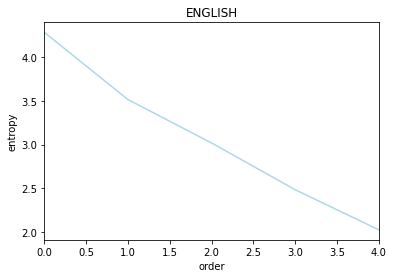

LATIN
Entropy for order 0 equals 4.288221453845133 bits
Entropy for order 1 equals 3.4501260596144285 bits
Entropy for order 2 equals 2.823492012531133 bits
Entropy for order 3 equals 2.1520313374215085 bits
Entropy for order 4 equals 1.6427637761375666 bits


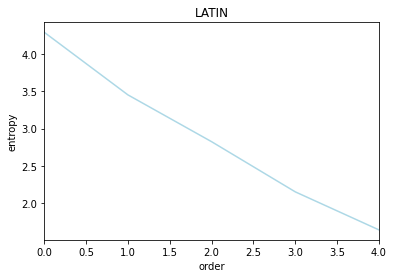

SAMPLE0
Entropy for order 0 equals 4.288221453845133 bits
Entropy for order 1 equals 2.915894004347894 bits
Entropy for order 2 equals 2.00035924493487 bits
Entropy for order 3 equals 1.5392818308881442 bits
Entropy for order 4 equals 1.4385817627111477 bits


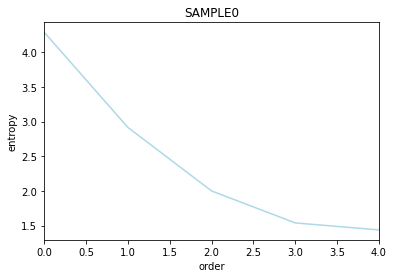

SAMPLE1
Entropy for order 0 equals 4.288221453845133 bits
Entropy for order 1 equals 3.239149992123347 bits
Entropy for order 2 equals 2.8612796847871795 bits
Entropy for order 3 equals 2.3266847405634032 bits
Entropy for order 4 equals 1.8135100091144944 bits


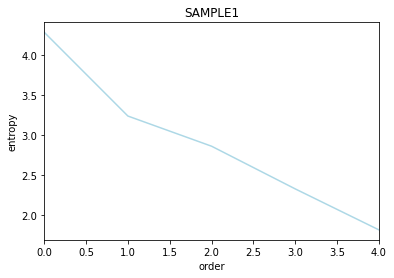

SAMPLE2
Entropy for order 0 equals 4.288221453845133 bits
Entropy for order 1 equals 3.050439282781127 bits
Entropy for order 2 equals 2.467660235741552 bits
Entropy for order 3 equals 1.939772326144397 bits
Entropy for order 4 equals 1.7020325739558706 bits


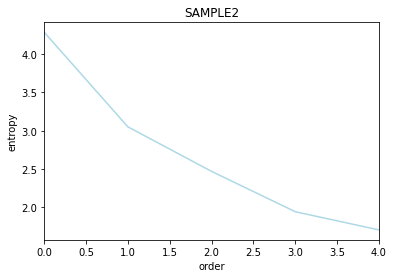

SAMPLE3
Entropy for order 0 equals 4.288221453845133 bits
Entropy for order 1 equals 3.1844670670954263 bits
Entropy for order 2 equals 2.6278957095513134 bits
Entropy for order 3 equals 2.0239914888059407 bits
Entropy for order 4 equals 1.534243355401003 bits


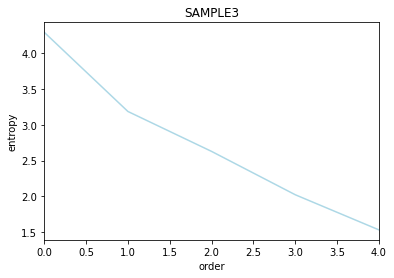

SAMPLE4
Entropy for order 0 equals 4.288221453845133 bits
Entropy for order 1 equals 4.229101430962362 bits
Entropy for order 2 equals 4.226828937890913 bits
Entropy for order 3 equals 4.1785351482827835 bits
Entropy for order 4 equals 3.7661315160283046 bits


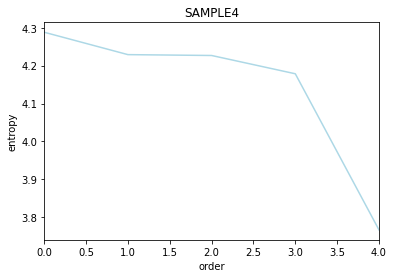

SAMPLE5
Entropy for order 0 equals 4.288221453845133 bits
Entropy for order 1 equals 3.5230981260850296 bits
Entropy for order 2 equals 3.250620854649217 bits
Entropy for order 3 equals 2.83427148565169 bits
Entropy for order 4 equals 2.1724407900562195 bits


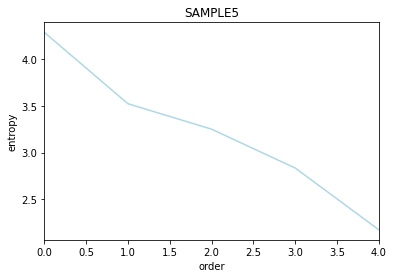

In [30]:
order = 4
eng = "norm_wiki_en.txt"
lat = "norm_wiki_la.txt"

s0 = "sample0.txt"
s1 = "sample1.txt"
s2 = "sample2.txt"
s3 = "sample3.txt"
s4 = "sample4.txt"
s5 = "sample5.txt"

show_char_plot(eng, order, 'ENGLISH')
show_char_plot(lat, order, 'LATIN')

show_char_plot(s0, order, 'SAMPLE0')
show_char_plot(s1, order, 'SAMPLE1')
show_char_plot(s2, order, 'SAMPLE2')
show_char_plot(s3, order, 'SAMPLE3')
show_char_plot(s4, order, 'SAMPLE4')
show_char_plot(s5, order, 'SAMPLE5')

Sample0, Sample4 and Sample5 are definitely not natural language texts - the graphs differs a lot from those for english and latin.
Sample3 is a natural language text - it's shape is nearly the same as for English text. With Sample1 i have some doubts because of the jump for order no.1, but rest of the  graph looks similar to the english and latin language entropy graphs. Therefore I think, that Sample1 is true. Sample2 has such jumps in 2 places, therefore I think, that it isn't a natural language text.